# Introduction and Problem Statement
_Work in progress_

# Import Libraries

In [1]:
# Import required libraries
import sys
sys.path.append("../src")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import util as utils

from imblearn.under_sampling import RandomUnderSampler

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

In [78]:
# Load configuration file
config = utils.load_config()

# Data Exploration

In [3]:
# Load train dataset
X_train = utils.pickle_load(config["train_path"][0])
y_train = utils.pickle_load(config["train_path"][1])

train = pd.concat([X_train, y_train], axis=1)

In [4]:
# Show data sample
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13382,31,services,married,secondary,no,1,yes,no,cellular,9,jul,82,1,-1,0,unknown,no
32641,35,services,married,secondary,no,195,yes,no,cellular,17,apr,203,1,-1,0,unknown,no
3991,24,blue-collar,single,secondary,no,77,yes,no,unknown,16,may,236,2,-1,0,unknown,no
8068,35,blue-collar,married,secondary,no,80,yes,yes,unknown,2,jun,579,2,-1,0,unknown,no
27484,37,services,single,secondary,no,105,no,yes,cellular,21,nov,197,2,157,4,failure,no


In [5]:
# Show number of rows and columns
print(f"Number of rows: {train.shape[0]}")
print(f"Number of columns: {train.shape[1]}")

Number of rows: 31647
Number of columns: 17


In [7]:
# Show a concise summary of data
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31647 entries, 13382 to 3184
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        31647 non-null  int64 
 1   job        31647 non-null  object
 2   marital    31647 non-null  object
 3   education  31647 non-null  object
 4   default    31647 non-null  object
 5   balance    31647 non-null  int64 
 6   housing    31647 non-null  object
 7   loan       31647 non-null  object
 8   contact    31647 non-null  object
 9   day        31647 non-null  int64 
 10  month      31647 non-null  object
 11  duration   31647 non-null  int64 
 12  campaign   31647 non-null  int64 
 13  pdays      31647 non-null  int64 
 14  previous   31647 non-null  int64 
 15  poutcome   31647 non-null  object
 16  y          31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.3+ MB


In [9]:
# Check missing values in data
print(f"Number of rows with missing values: {train.isnull().sum().sum()}")

Number of rows with missing values: 0


In [12]:
# Check data range for numerical columns
data_range = pd.DataFrame(columns=["Features", "Min", "Max"])
for column in train[config["int_columns"]].columns:
    data = pd.DataFrame(data={"Features": [column], "Min": [train[column].min()], "Max": [train[column].max()]})
    data_range = pd.concat([data_range, data], axis=0)

# Show result
data_range.reset_index(drop=True)

,Features,Min,Max
0,age,18,95
1,balance,-8019,102127
2,day,1,31
3,duration,0,4918
4,campaign,1,63
5,pdays,-1,871
6,previous,0,275


In [13]:
# Check label proportion
train["y"].value_counts(normalize=True)

y
no     0.883022
yes    0.116978
Name: proportion, dtype: float64

There are only 12% of data that labelled as `yes`, it means this data is imbalanced. So we need to do resampling method later. For now, we will do under sampling for data exploration. Hopefully by doing this we can get more insight from the data.

In [20]:
# Random under sampling
X_rus, y_rus = RandomUnderSampler(random_state=42).fit_resample(
    train.drop(columns=config["label"]),
    train[config["label"]]
)

train_rus = pd.concat([X_rus, y_rus], axis=1)

## Age

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

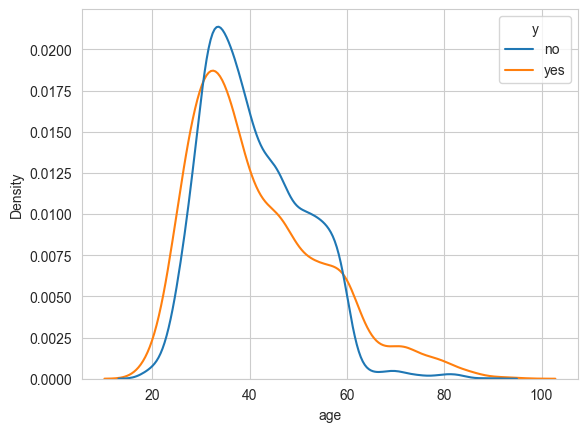

Data skewness: 0.8659376962148376


In [44]:
# Check data distribution
sns.kdeplot(train_rus, x="age", hue="y")
plt.show()
print(f"Data skewness: {train_rus['age'].skew()}")

`age` column is moderately skew. Based on `train_rus`, we see that there is no significant difference between `no` and `yes` class in terms of `age` distribution.

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


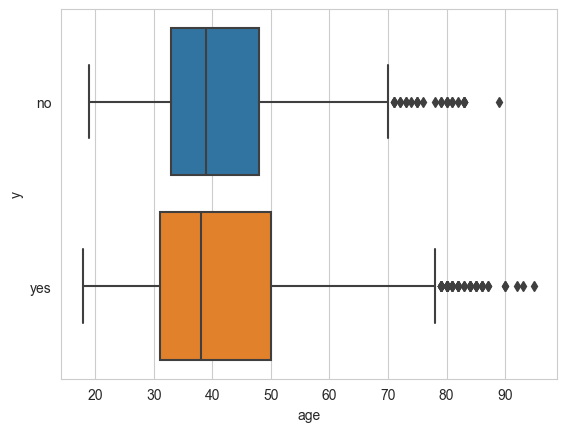

In [23]:
# Check outliers
sns.boxplot(train_rus, x="age", y="y")
plt.show()

There are some outliers in `age` column.

## Job

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

(0.0, 100.0)

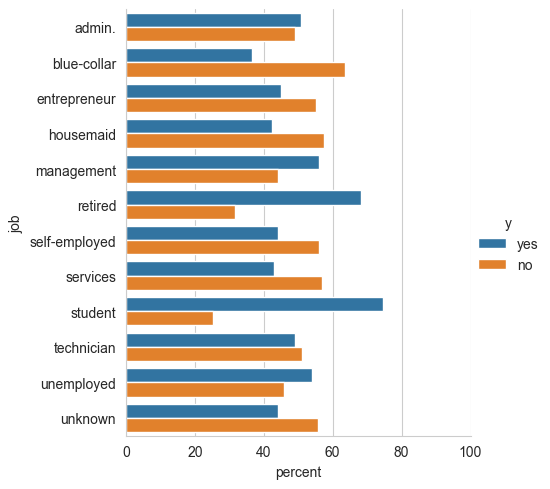

In [30]:
# Check proportion of data for each job
x = "job"
y = "y"

temp = train_rus.groupby(x)[y].value_counts(normalize=True)
temp = temp.mul(100)
temp = temp.rename("percent").reset_index()

g = sns.catplot(y=x,x="percent", hue=y, kind="bar",data=temp)
g.ax.set_xlim(0, 100)

Based on `train_rus`, `retired`, `student`, and `blue-collar` has significant higher probability to become class `yes` compared to other `job`. Since for other `job` the probability between `yes` and `no` are similar, later we can re-categorize `job` column into only 4 class: `blue-collar`, `retired`, `student`, and `others`. By doing this, we can reduce data dimension if we want to use one-hot encoding.

## Marital

In [32]:
train.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13382,31,services,married,secondary,no,1,yes,no,cellular,9,jul,82,1,-1,0,unknown,no
32641,35,services,married,secondary,no,195,yes,no,cellular,17,apr,203,1,-1,0,unknown,no


d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

(0.0, 100.0)

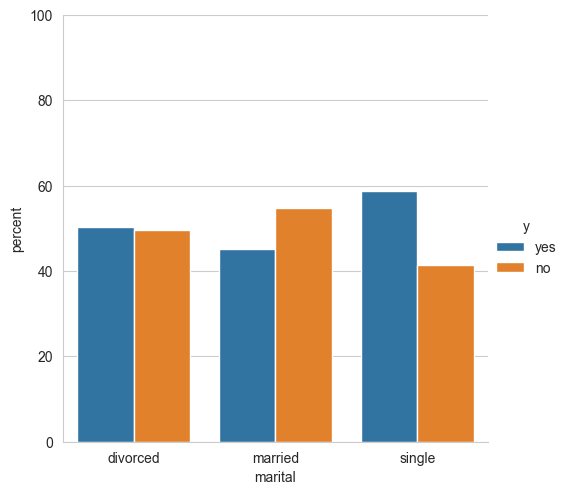

In [35]:
# Check proportion of data for each job
x = "marital"
y = "y"

temp = train_rus.groupby(x)[y].value_counts(normalize=True)
temp = temp.mul(100)
temp = temp.rename("percent").reset_index()

g = sns.catplot(x=x,y="percent", hue=y, kind="bar",data=temp)
g.ax.set_ylim(0, 100)

There is no significant difference between `marital` in terms of probability to become `yes`. But since there are only 3 category, for now we can keep this column even we need to do one-hot encoding.

## Education

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

(0.0, 100.0)

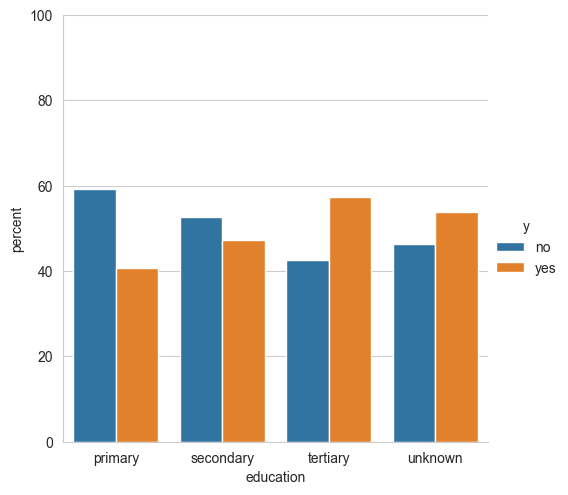

In [46]:
# Check proportion of data for each job
x = "education"
y = "y"

temp = train_rus.groupby(x)[y].value_counts(normalize=True)
temp = temp.mul(100)
temp = temp.rename("percent").reset_index()

g = sns.catplot(x=x,y="percent", hue=y, kind="bar",data=temp)
g.ax.set_ylim(0, 100)

In [42]:
# Check how many unknown education
print(f"Percentage of row with unknown education: {train[train['education'] == 'unknown'].shape[0] / train.shape[0]}")

Percentage of row with unknown education: 0.04152052327234809


There is no significant difference between `education` in terms of probability to become `yes`. We can do label encoding due to it's ordinality. For `unknown`, it has similar pattern with `secondary`, so later we will assume `unknown` as `secondary`, considering it's only 4% of the data.

## Default

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

(0.0, 100.0)

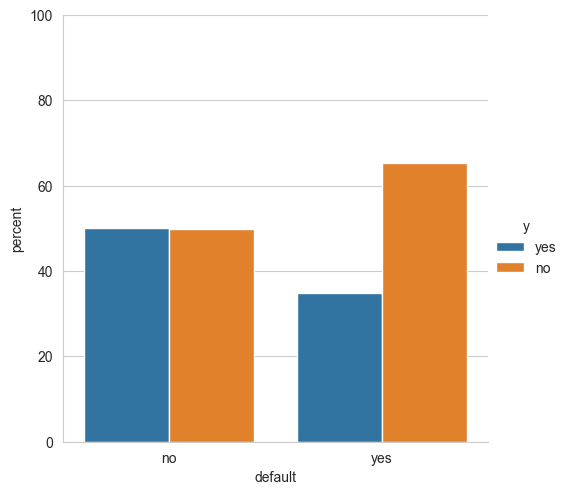

In [48]:
# Check proportion of data for each job
x = "default"
y = "y"

temp = train_rus.groupby(x)[y].value_counts(normalize=True)
temp = temp.mul(100)
temp = temp.rename("percent").reset_index()

g = sns.catplot(x=x,y="percent", hue=y, kind="bar",data=temp)
g.ax.set_ylim(0, 100)

When client has default credit, it tend to be class `no`. It make sense, since usually they want to focus on their credit first before applying for another campaign.

## Balance

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

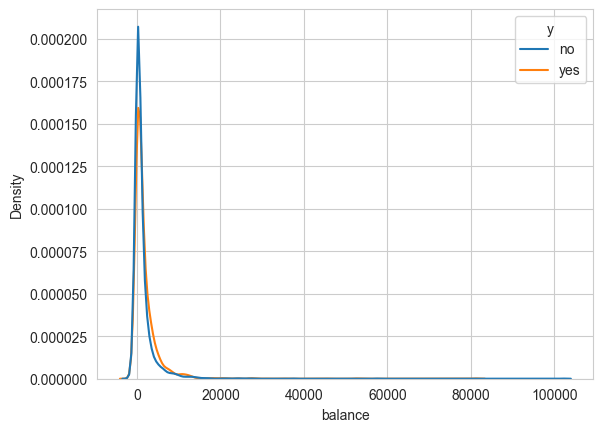

Data skewness: 10.70199087530434


In [55]:
# Check data distribution
sns.kdeplot(train_rus, x="balance", hue="y")
plt.show()
print(f"Data skewness: {train_rus['balance'].skew()}")

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


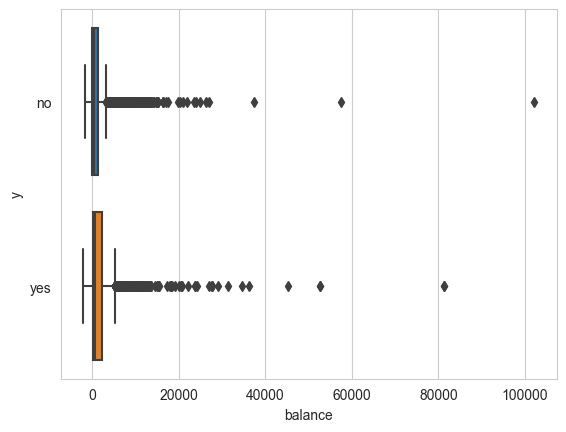

In [51]:
# Check outliers
sns.boxplot(train_rus, x="balance", y="y")
plt.show()

`balance` column is very skew. Let's try to see it's distribution when we take out the outliers.

In [52]:
def remove_outliers(data, column, threshold=1.5):
    """
    Remove outliers from a numerical column in a DataFrame using the IQR method.

    Parameters:
    - data: DataFrame
        The DataFrame containing the data.
    - column: str
        The name of the numerical column from which outliers will be removed.
    - threshold: float, optional (default=1.5)
        The threshold for determining outliers. Values beyond (Q3 + threshold * IQR) or below (Q1 - threshold * IQR)
        are considered outliers, where Q1 is the first quartile, Q3 is the third quartile, and IQR is the interquartile range.

    Returns:
    - DataFrame
        A DataFrame with outliers removed from the specified column.
    """
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Filter the data to remove outliers
    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return data_no_outliers

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

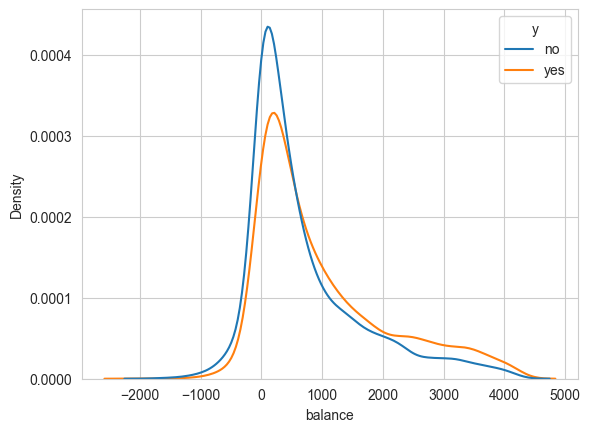

Data skewness: 1.3034306202685617


In [54]:
# Check data distribution
sns.kdeplot(remove_outliers(train_rus, column="balance"), x="balance", hue="y")
plt.show()
print(f"Data skewness: {remove_outliers(train_rus, column='balance')['balance'].skew()}")

There is no significant difference between `yes` and `no` in terms of `balance` distribution.

## Housing

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

(0.0, 100.0)

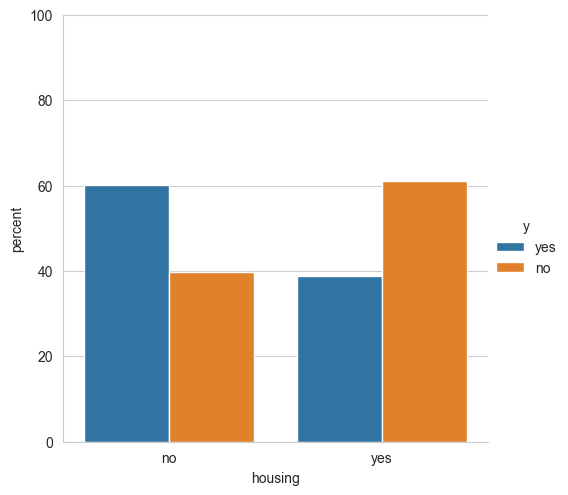

In [57]:
# Check proportion of data for each job
x = "housing"
y = "y"

temp = train_rus.groupby(x)[y].value_counts(normalize=True)
temp = temp.mul(100)
temp = temp.rename("percent").reset_index()

g = sns.catplot(x=x,y="percent", hue=y, kind="bar",data=temp)
g.ax.set_ylim(0, 100)

Client that has `housing` loan tend to be `no` class. It make sense since they want to focus on their `housing` loan.

## Loan

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

(0.0, 100.0)

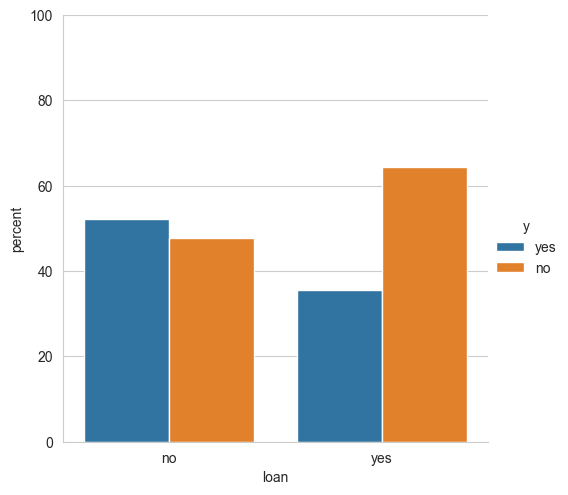

In [59]:
# Check proportion of data for each job
x = "loan"
y = "y"

temp = train_rus.groupby(x)[y].value_counts(normalize=True)
temp = temp.mul(100)
temp = temp.rename("percent").reset_index()

g = sns.catplot(x=x,y="percent", hue=y, kind="bar",data=temp)
g.ax.set_ylim(0, 100)

Client that has `loan` tend to be `no` class. It make sense since they want to focus on their `loan`.

## Contact

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

(0.0, 100.0)

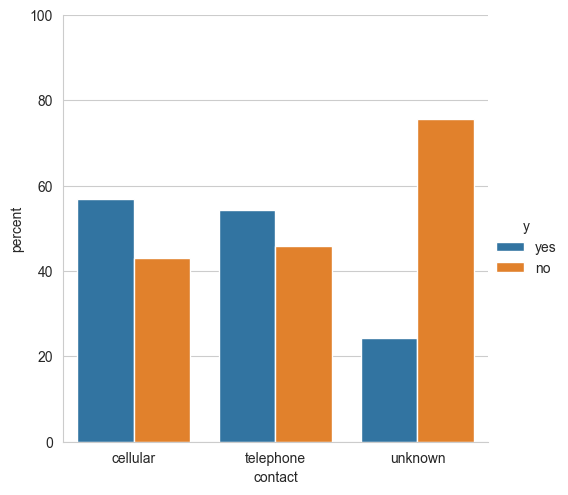

In [61]:
# Check proportion of data for each job
x = "contact"
y = "y"

temp = train_rus.groupby(x)[y].value_counts(normalize=True)
temp = temp.mul(100)
temp = temp.rename("percent").reset_index()

g = sns.catplot(x=x,y="percent", hue=y, kind="bar",data=temp)
g.ax.set_ylim(0, 100)

In [62]:
# Check how many unknown contact
print(f"Percentage of row with unknown contact: {train[train['contact'] == 'unknown'].shape[0] / train.shape[0]}")

Percentage of row with unknown contact: 0.28754700287547


`contact` type `unknown` tend to be class `no`, while the others has similar probability. Later we will only categorize it into 2: `unknown` and `cellular/telephone` due to it's similarity.

## Day

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

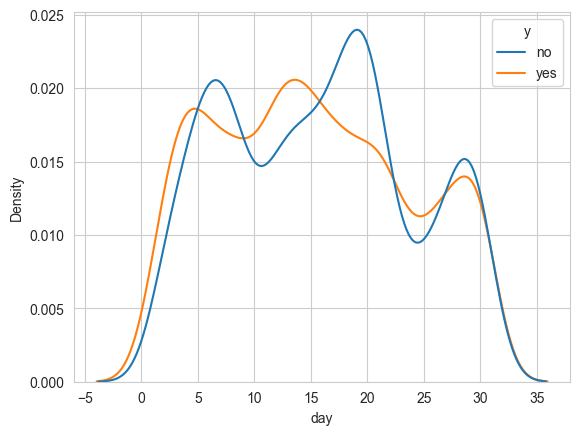

Data skewness: 0.1373172714316125


In [66]:
# Check data distribution
sns.kdeplot(train_rus, x="day", hue="y")
plt.show()
print(f"Data skewness: {train_rus['day'].skew()}")

There is no significant difference between `yes` and `no` in terms of `day` distribution.

## Month

In [71]:
temp.head()

,month,y,percent
0,apr,yes,64.012739
1,apr,no,35.987261
2,aug,no,50.260146
3,aug,yes,49.739854
4,dec,yes,87.356322


d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

(0.0, 100.0)

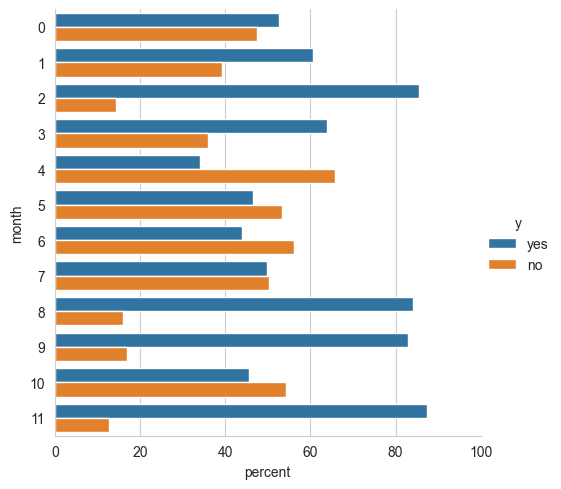

In [96]:
# Check proportion of data for each job
x = "month"
y = "y"

temp = train_rus.groupby(x)[y].value_counts(normalize=True)
temp = temp.mul(100)
temp = temp.rename("percent").reset_index()

temp["month"] = temp["month"].apply(lambda x: str(config["month_code"].index(x)))

g = sns.catplot(y=x,x="percent", hue=y, kind="bar",data=temp, order=[str(i) for i in range(12)])
g.ax.set_xlim(0, 100)

Client tend to be `yes` in several month. It means this feature potentially importance.

## Duration

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

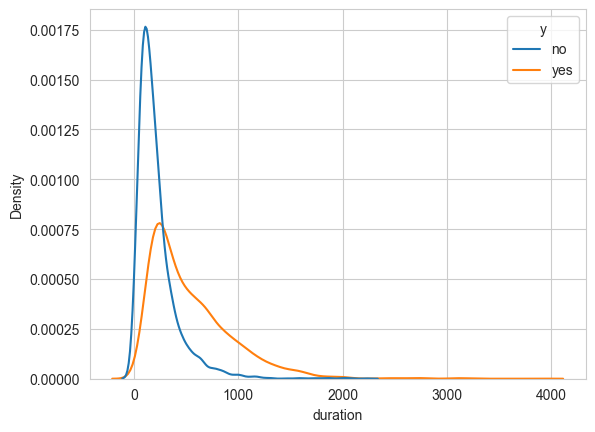

Data skewness: 2.1849690231930476


In [98]:
# Check data distribution
sns.kdeplot(train_rus, x="duration", hue="y")
plt.show()
print(f"Data skewness: {train_rus['duration'].skew()}")

d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\portfolio\pacmann\bank-marketing\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

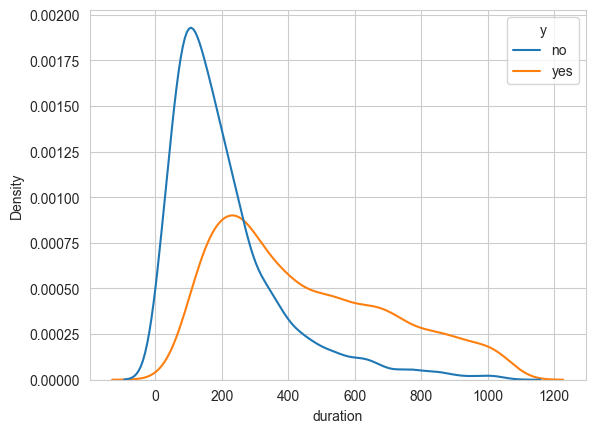

Data skewness: 1.1029875679631478


In [100]:
# Check data distribution
sns.kdeplot(remove_outliers(train_rus, "duration"), x="duration", hue="y")
plt.show()
print(f"Data skewness: {remove_outliers(train_rus, 'duration')['duration'].skew()}")

Client with higher `duration` tend to be `yes`. It make sense since it indicates that the clients is willing to hear more about the campaign.

In [101]:
train.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13382,31,services,married,secondary,no,1,yes,no,cellular,9,jul,82,1,-1,0,unknown,no
32641,35,services,married,secondary,no,195,yes,no,cellular,17,apr,203,1,-1,0,unknown,no
